In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d import Axes3D
from time import time
from functions import *


plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['image.cmap'] = 'viridis'

n = 200
n1, n2, n3 = n, n, n

def plot_isosurface(ax, data, title, color, iso_level=0.5):
    verts, faces, _, _ = measure.marching_cubes(data, level=iso_level)
    
    # Softer transparency and lighter edges
    mesh = Poly3DCollection(verts[faces], alpha=0.15, facecolors=color, edgecolor='grey', linewidth=0.1, shade = True)
    ax.add_collection3d(mesh)

    # Set plot limits
    ax.set_xlim(0, n1)
    ax.set_ylim(0, n2)
    ax.set_zlim(0, n3)
    ax.set_xticks(np.linspace(0, n1, num=3))
    ax.set_yticks(np.linspace(0, n2, num=3))
    ax.set_zticks(np.linspace(0, n3, num=3))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')
    ax.set_box_aspect([1, 1, 1])
    ax.set_title(title, fontsize=10)
    plt.tight_layout()

x, y, z = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1),
                    np.linspace(0.5/n2,1-0.5/n2,n2),
                    np.linspace(0.5/n3, 1-0.5/n3, n3))

nu1, nu2 = np.zeros((n1,n2,n3)), np.zeros((n1,n2,n3))

nu1[(x-0.5)**2+(y-0.5)**2+(z-0.5)**2<0.4**2] = 1
nu2[(abs(x-0.5)<0.2) & (abs(y-0.5)<0.2) & (abs(z-0.5)<0.2)] = 1

nu1 *= n1 * n2 * n3 / np.sum(nu1)
nu2 *= n1 * n2 * n3 / np.sum(nu2)

# Weight : 1/2, 1/2

In [ ]:
lr = 5e-3

mu_sga1 = np.load('/Users/anonymous/Documents/Recent/SGA/Case3D/image/2shapes/option1/sqrt/'+str(lr)+'_2000/result.npy')
mu_sga2 = np.load('/Users/anonymous/Documents/Recent/SGA/Case3D/image/2shapes/option2/sqrt/'+str(lr)+'_2000/result.npy')
mu_sga3 = np.load('/Users/anonymous/Documents/Recent/SGA/Case3D/image/2shapes/option3/sqrt/'+str(lr)+'_2000/result.npy')

error1 = np.load('/Users/anonymous/Documents/Recent/SGA/Case3D/image/2shapes/option1/sqrt/'+str(lr)+'_2000/error/error2000.npy')
error2 = np.load('/Users/anonymous/Documents/Recent/SGA/Case3D/image/2shapes/option2/sqrt/'+str(lr)+'_2000/error/error2000.npy')
error3 = np.load('/Users/anonymous/Documents/Recent/SGA/Case3D/image/2shapes/option3/sqrt/'+str(lr)+'_2000/error/error2000.npy')

optimal1, optimal2, optimal3 = np.max(error1), np.max(error2), np.max(error3)

# Overall

In [ ]:
print(optimal3, optimal1, optimal2)

/var/folders/1x/3k6lld0102scs17z3spqws940000gn/T/ipykernel_73790/3434667673.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/var/folders/1x/3k6lld0102scs17z3spqws940000gn/T/ipykernel_73790/3434667673.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/1x/3k6lld0102scs17z3spqws940000gn/T/ipykernel_73790/3434667673.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


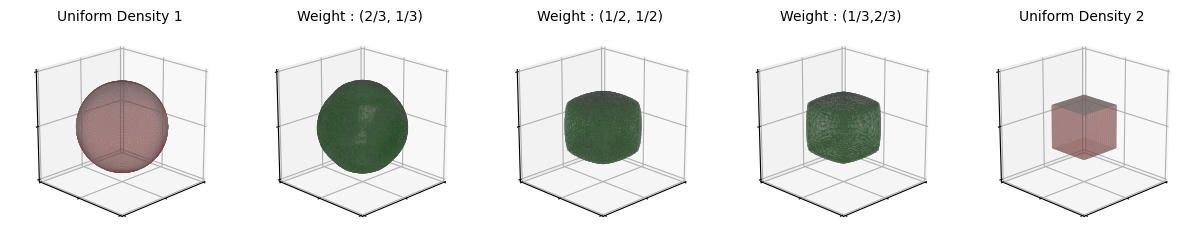

In [ ]:
fig = plt.figure(figsize=(15, 4))
iso_level = 0.01

ax1 = fig.add_subplot(1,5,1, projection='3d')
plot_isosurface(ax1, nu1, "Uniform Density 1", 'red')
ax1.view_init(elev=20, azim=45)  # Adjusted for better perspective

ax2 = fig.add_subplot(1,5,2, projection='3d')
plot_isosurface(ax2, mu_sga3, "Weight : (2/3, 1/3)", 'green')
ax2.view_init(elev=20, azim=45)

ax3 = fig.add_subplot(1,5,3, projection='3d')
plot_isosurface(ax3, mu_sga1, "Weight : (1/2, 1/2)", 'green')
ax3.view_init(elev=20, azim=45)

ax4 = fig.add_subplot(1,5,4, projection='3d')
plot_isosurface(ax4, mu_sga2, "Weight : (1/3,2/3)", 'green')
ax4.view_init(elev=20, azim=45)  # Adjusted for better perspective

ax5 = fig.add_subplot(1,5,5, projection='3d')
plot_isosurface(ax5, nu2, "Uniform Density 2", 'red')
ax5.view_init(elev=20, azim=45)
